In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

MOST POPULAR GENRES

The following bar plot shows the frequency of each genre.

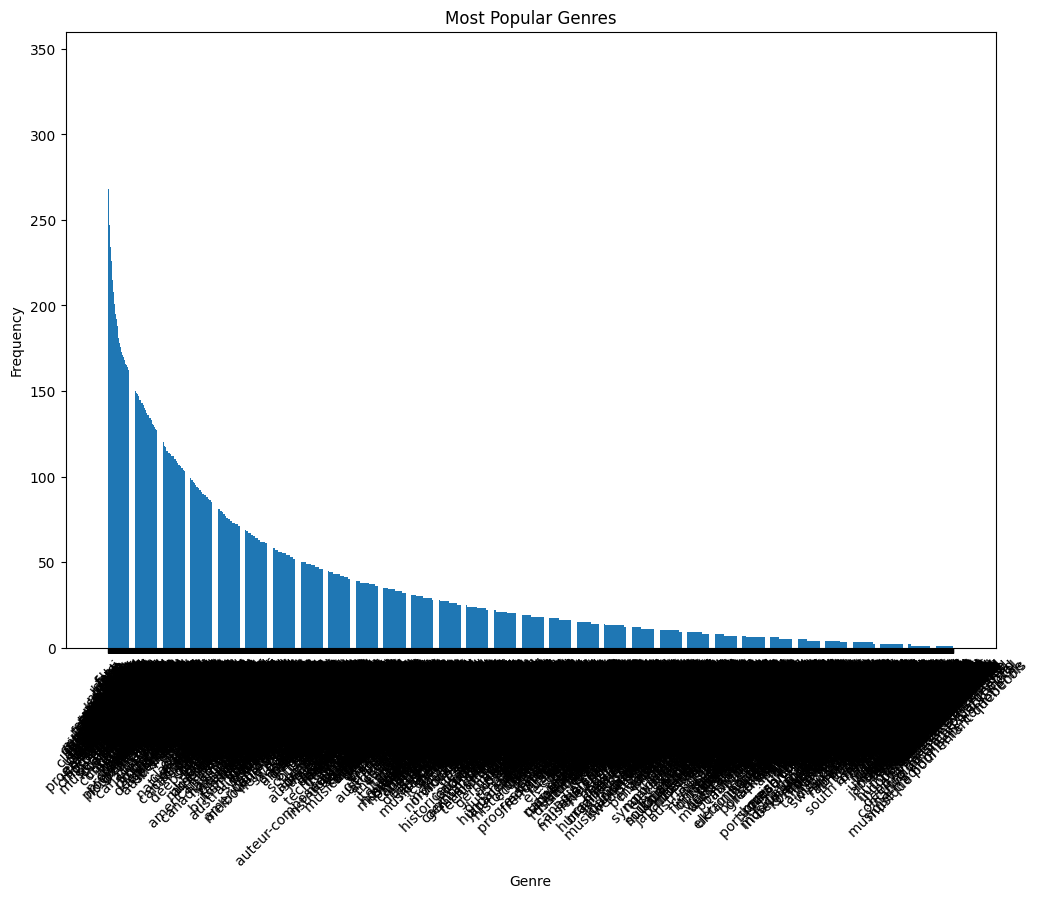

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

path_edits = 'GENRECOUNTS/' 
all_files_edits = glob.glob(path_edits + "*.csv")
genre_counts_df  = pd.concat((pd.read_csv(f) for f in all_files_edits))

genre_counts_df = genre_counts_df.sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))
plt.bar(genre_counts_df['genre'], genre_counts_df['count'])
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Most Popular Genres')
plt.show()


This shows the top 20 most popular genres.

<Figure size 1000x600 with 0 Axes>

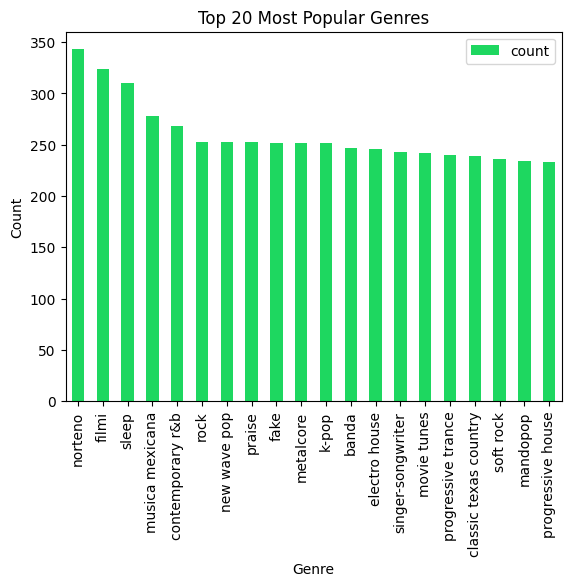

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Color palette
colors = ["#1ED760", "#120D1A", "#82E6A6"]

path_edits = 'GENRECOUNTS/'  
all_files_edits = glob.glob(path_edits + "*.csv")
genre_counts_df  = pd.concat((pd.read_csv(f) for f in all_files_edits))

genre_counts_aggregated = genre_counts_df.groupby('genre')['count'].sum().reset_index()

plt.figure(figsize=(10, 6))
genre_counts_aggregated.sort_values(by='count', ascending=False, inplace=True)
genre_counts_aggregated.head(20).plot(kind='bar', x='genre', y='count', color=colors[0])
plt.title("Top 20 Most Popular Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


This is a word cloud of the most popular genres.

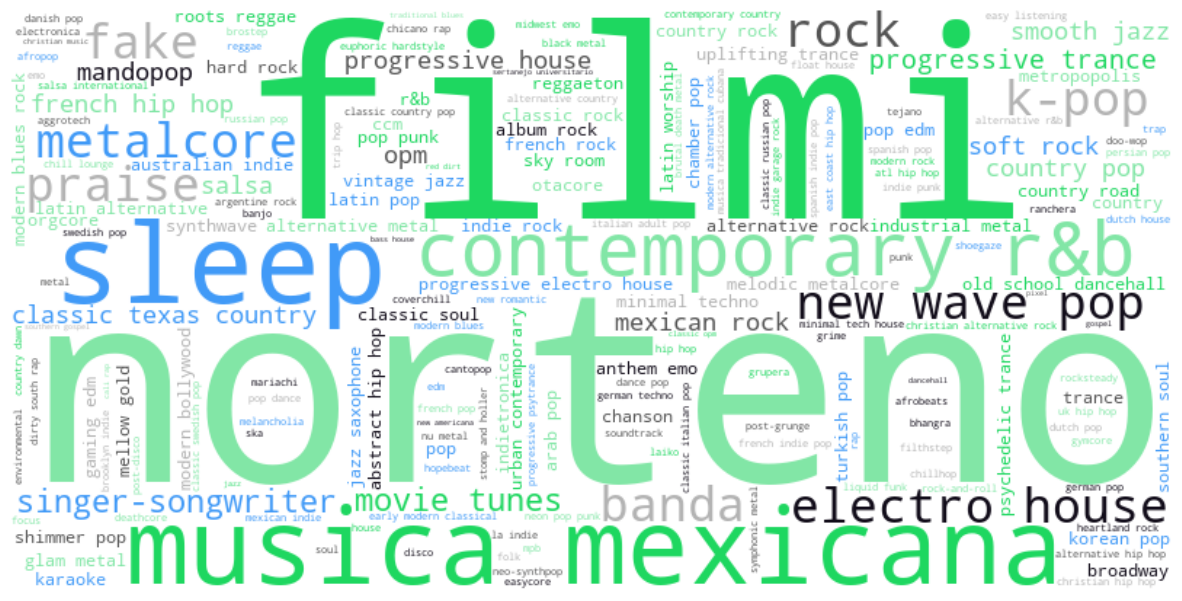

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#Color Function
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = [ "#419AF7", "#535353", "#b3b3b3",  "#120D1A", "#1ED760","#82E6A6", ]
    return colors[random_state.randint(0, len(colors) - 1)]  

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=custom_color_func, random_state=42).generate_from_frequencies(dict(zip(genre_counts_df['genre'], genre_counts_df['count'])))

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


GENRES ASSOCIATED WITH ARTISTS

This is the distribution of the number of genres each artists has.

C:\Users\Smriti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


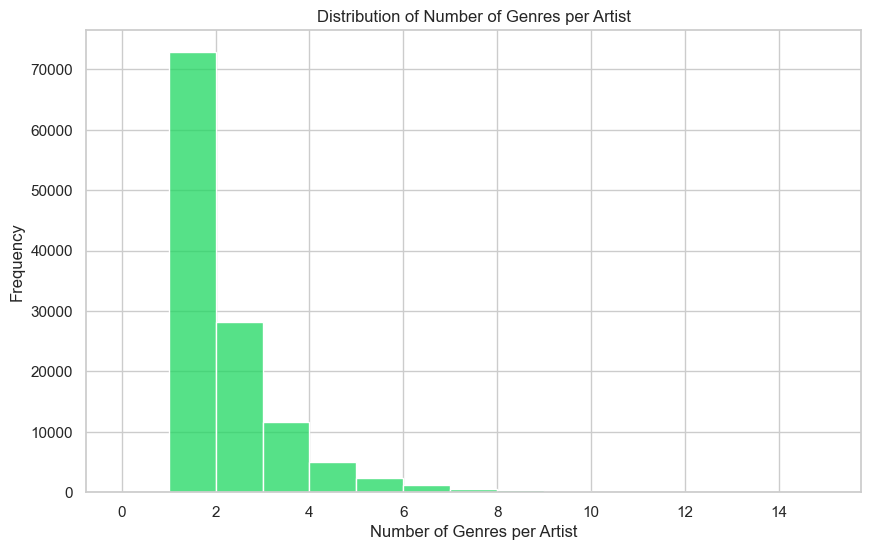

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

sns.set(style="whitegrid")

colors = ["#1ED760", "#120D1A", "#82E6A6"]

path = 'GENRESPERARTISTS/' 
all_files = glob.glob(path + "*.csv")
genres_per_artist_df = pd.concat((pd.read_csv(f) for f in all_files))

plt.figure(figsize=(10, 6))


sns.histplot(genres_per_artist_df['num_genres'], bins=range(int(genres_per_artist_df['num_genres'].max()) + 1), kde=False, color=colors[0])
plt.xlabel('Number of Genres per Artist')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Genres per Artist')
plt.show()
